In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset from this exercise comes from openml, and has 1460 lines. The train dataset from Kaggle also has 1460 lines, and the associated test set doesn't have the SalePrice column, which is the target column.
The first thing we can do in order to improve the model's results, is to start fresh with the original dataset, which has 2930 observations.
This original dataset can be downloaded as an Excel file from "http://jse.amstat.org/v19n3/decock/AmesHousing.xls"

In [2]:
# Loads the Ames Housing Dataset
ames = pd.read_excel("AmesHousing.xls")

In [3]:
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
ames.shape

(2930, 82)

In [5]:
ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
# List of all the columns in the dataset
ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [46]:
# Check for duplicates
idsUnique = len(set(ames.Order))
idsTotal = ames.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 2930 total entries


In [10]:
# Drop Order column
ames.drop("Order", axis = 1, inplace = True)

In [14]:
# Check for missing values
pd.set_option('display.max_rows', None)
ames.isnull().sum()

PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air     


"SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students." (source: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

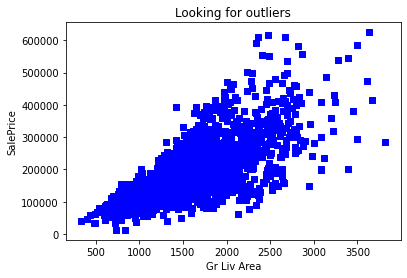

In [34]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(ames["Gr Liv Area"], ames["SalePrice"], c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.show()

In [21]:
ames = ames[ames["Gr Liv Area"] < 4000]

In [23]:
pd.set_option('display.max_rows', 20)
ames

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [25]:
# Drop the PID column
ames.drop("PID", axis = 1, inplace = True)

/home/apprenant/anaconda3/envs/Projet_E2_P1/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [31]:
# Handle missing values for features where median/mean or most common value doesn't make sense
# Source: https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook

# LotFrontage : NA most likely means no lot frontage
ames.loc[:, "Lot Frontage"] = ames.loc[:, "Lot Frontage"].fillna(0)

/home/apprenant/anaconda3/envs/Projet_E2_P1/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
# Alley : data description says NA means "no alley access"
ames.loc[:, "Alley"] = ames.loc[:, "Alley"].fillna("None")

In [33]:
# Mas Vnr Type : NA most likely means no veneer
ames.loc[:, "Mas Vnr Type"] = ames.loc[:, "Mas Vnr Type"].fillna("None")
ames.loc[:, "Mas Vnr Area"] = ames.loc[:, "Mas Vnr Area"].fillna(0)

/home/apprenant/anaconda3/envs/Projet_E2_P1/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [35]:
# Bsmt Qual etc : data description says NA for basement features is "no basement"
ames.loc[:, "Bsmt Qual"] = ames.loc[:, "Bsmt Qual"].fillna("No")
ames.loc[:, "Bsmt Cond"] = ames.loc[:, "Bsmt Cond"].fillna("No")
ames.loc[:, "Bsmt Exposure"] = ames.loc[:, "Bsmt Exposure"].fillna("No")
ames.loc[:, "BsmtFin Type 1"] = ames.loc[:, "BsmtFin Type 1"].fillna("No")
ames.loc[:, "BsmtFin Type 2"] = ames.loc[:, "BsmtFin Type 2"].fillna("No")
ames.loc[:, "Bsmt Full Bath"] = ames.loc[:, "Bsmt Full Bath"].fillna(0)
ames.loc[:, "Bsmt Half Bath"] = ames.loc[:, "Bsmt Half Bath"].fillna(0)
ames.loc[:, "Bsmt Unf SF"] = ames.loc[:, "Bsmt Unf SF"].fillna(0)

/home/apprenant/anaconda3/envs/Projet_E2_P1/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


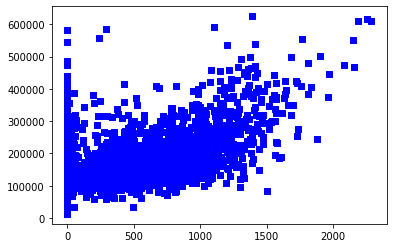

In [37]:
# Plot distribution of BsmtFin SF 1
plt.scatter(ames["BsmtFin SF 1"], ames["SalePrice"], c = "blue", marker = "s")

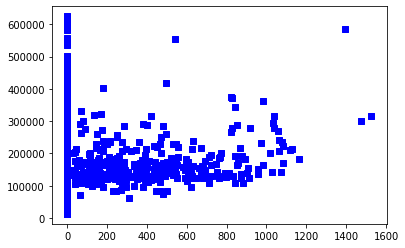

In [38]:
# Plot distribution of BsmtFin SF 2
plt.scatter(ames["BsmtFin SF 2"], ames["SalePrice"], c = "blue", marker = "s")

In [40]:
ames.loc[:, "BsmtFin SF 1"] = ames.loc[:, "BsmtFin SF 1"].fillna(0)
ames.loc[:, "BsmtFin SF 2"] = ames.loc[:, "BsmtFin SF 2"].fillna(0)
ames.loc[:, "Total Bsmt SF"] = ames.loc[:, "Total Bsmt SF"].fillna(0)

<AxesSubplot:>

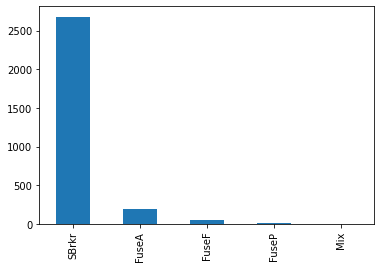

In [48]:
# Plot histogram of Electrical values count
ames.Electrical.value_counts().plot(kind = "bar")

In [49]:
ames.loc[:, "Electrical"] = ames.loc[:, "Electrical"].fillna("SBrkr")

In [50]:
# Check for missing values
pd.set_option('display.max_rows', None)
ames.isnull().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley                 0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical      

In [52]:
# FireplaceQu : data description says NA means "no fireplace"
ames.loc[:, "Fireplace Qu"] = ames.loc[:, "Fireplace Qu"].fillna("No")

In [54]:
# GarageType etc : data description says NA for garage features is "no garage"
ames.loc[:, "Garage Type"] = ames.loc[:, "Garage Type"].fillna("No")
ames.loc[:, "Garage Finish"] = ames.loc[:, "Garage Finish"].fillna("No")
ames.loc[:, "Garage Qual"] = ames.loc[:, "Garage Qual"].fillna("No")
ames.loc[:, "Garage Cond"] = ames.loc[:, "Garage Cond"].fillna("No")
ames.loc[:, "Garage Area"] = ames.loc[:, "Garage Area"].fillna(0)
ames.loc[:, "Garage Cars"] = ames.loc[:, "Garage Cars"].fillna(0)

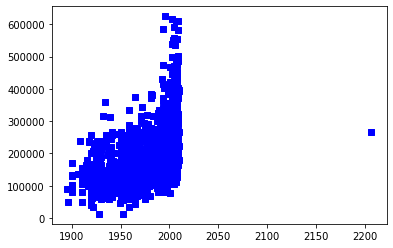

In [55]:
# Plot the distribution of Garage Yr Blt
plt.scatter(ames["Garage Yr Blt"], ames["SalePrice"], c = "blue", marker = "s")

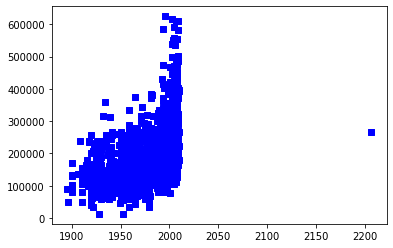

In [62]:
# Plot the distribution of Garage Yr Blt with NA
plt.scatter(ames["Garage Yr Blt"].fillna(
    ames["Garage Yr Blt"].median()), ames["SalePrice"], c = "blue", marker = "s")

In [63]:
ames.loc[:, "Garage Yr Blt"] = ames.loc[:, "Garage Yr Blt"].fillna(
    ames["Garage Yr Blt"].median(), inplace = True)

In [ ]:
ames = ames[ames["Garage Yr Blt"] < 2100]